Evan Pradipta Hardinatha-1103204160
Overview
Dataset yang digunakan adalah dataset, Restaurant Sales Datasets
Restaurant Sales Datasets adalah dataset yang saya dapatkan dari CV Balibul untuk dianalisa dan digunakan untuk membuat model Prediksi
Model yang akan digunakan adalah model Random Forest Regressor dari library sklearn.

RANDOM FOREST REGRESSOR
Random Forest Regressor adalah algoritma Machine Learning yang termasuk dalam kategori Ensemble Learning dan digunakan untuk memecahkan masalah regresi. Ini adalah variasi dari algoritma Random Forest, yang pada dasarnya merupakan kumpulan dari beberapa pohon keputusan (Decision Trees). Random Forest Regressor dibangun dengan menggabungkan prediksi dari beberapa pohon keputusan untuk menghasilkan prediksi regresi yang lebih akurat dan stabil.

STEPS
1. EDA
2. Visualisasi
3. Training
4. Evaluating
5. New Data

Step By Step:

In [177]:
import pandas as pd
#library pandas untuk mengatur data
import matplotlib.pyplot as plt
#library matplotlib plot untuk melakukan visualisasi
import seaborn as sns
#library seaborn untuk visualisasi
from ipywidgets import interact
import ipywidgets as widgets
#ipywidgets untuk membuat interactive plot

EDA

EDA adalah singkatan dari "Exploratory Data Analysis" atau Analisis Data Eksploratif dalam bahasa Indonesia. Ini adalah suatu pendekatan untuk menganalisis dataset dan merumuskan hipotesis berdasarkan pemahaman awal terhadap data. Tujuan utama dari EDA adalah untuk memahami karakteristik utama dari data, mengidentifikasi pola yang menarik, dan menentukan langkah-langkah berikutnya dalam analisis.

Beberapa kegiatan umum dalam EDA melibatkan:

Ringkasan Data: Melihat ringkasan statistik, seperti mean, median, dan deviasi standar, untuk setiap variabel.

Pemahaman Distribusi: Menganalisis distribusi variabel-variabel utama dan mengidentifikasi apakah ada kecenderungan, pola, atau anomali.

Penanganan Data Hilang: Memeriksa dan menangani data yang hilang atau kosong.

Analisis Korelasi: Mengeksplorasi korelasi antar variabel untuk memahami hubungan di antara mereka.

In [178]:
#reading dataset
file_path = 'datasets/Restaurant Sales Datasets.xlsx'
df = pd.read_excel(file_path)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226347 entries, 0 to 226346
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   No. Struk          226347 non-null  object 
 1   Tanggal            226347 non-null  object 
 2   Jam                226347 non-null  object 
 3   Nama Outlet        226347 non-null  object 
 4   Nama Kasir         226347 non-null  object 
 5   Produk             226345 non-null  object 
 6   Jumlah Produk      226347 non-null  int64  
 7   Jumlah Dibatalkan  226347 non-null  int64  
 8   Harga Per Produk   226347 non-null  int64  
 9   Subtotal           226347 non-null  int64  
 10  Tipe Harga         226347 non-null  object 
 11  Diskon Produk      226347 non-null  int64  
 12  Diskon Transaksi   226347 non-null  int64  
 13  Pajak              198778 non-null  float64
 14  Total              198778 non-null  float64
 15  Status             198778 non-null  object 
 16  Me

Disini terlihat kita memiliki 16 kolom dengan data yang merupakan pecahan item pada masing-masing struk, dengan total 226347 data.

In [180]:
df.head()

,No. Struk,Tanggal,Jam,Nama Outlet,Nama Kasir,Produk,Jumlah Produk,Jumlah Dibatalkan,Harga Per Produk,Subtotal,Tipe Harga,Diskon Produk,Diskon Transaksi,Pajak,Total,Status,Metode Pembayaran
0,59614QIA,23-10-2023,14:09:32,Wates,Balibul Wates,"Sate Tegal 10 Campur, Reguler",1,0,60000,60000,Normal,0,0,0.0,60000.0,Transaksi,DEBIT
1,59614QIA,23-10-2023,14:09:32,Wates,Balibul Wates,"Tengkleng Masak/Segar, Reguler",1,0,35000,35000,Normal,0,0,0.0,35000.0,Transaksi,DEBIT
2,59614QIA,23-10-2023,14:09:32,Wates,Balibul Wates,"Gule/Gule Gongso/Goreng, Reguler",1,0,25000,25000,Normal,0,0,0.0,25000.0,Transaksi,DEBIT
3,59614QIA,23-10-2023,14:09:32,Wates,Balibul Wates,"Teh Panas/Es, Reguler",2,0,5000,10000,Normal,0,0,0.0,10000.0,Transaksi,DEBIT
4,59614QIA,23-10-2023,14:09:32,Wates,Balibul Wates,"Nasi Putih, Reguler",2,0,7000,14000,Normal,0,0,0.0,14000.0,Transaksi,DEBIT


Karena Data yang ada merupakan data tiap item dalam sebuah transaksi, kita akan mengumpulkan data ke tiap struk menggunakan pandas, berikut adalah cara yang saya lakukan.

In [181]:
# Konversi kolom Tanggal ke format DateTime
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
# Konversi kolom Jam ke format DateTime (Hanya jam dan menit)
df['Jam'] = pd.to_datetime(df['Jam'], format='%H:%M:%S').dt.time
# Gabungkan kolom 'Tanggal' dan 'Jam' ke dalam satu kolom DateTime
df['Tanggal'] = pd.to_datetime(df['Tanggal'].astype(str) + ' ' + df['Jam'].astype(str))
# Definisikan fungsi untuk mendapatkan shift
def get_shift(time):
    if 8 <= time.hour < 14:
        return 1
    elif 14 <= time.hour < 22:
        return 2
    else:
        return 0  # Shift 0 untuk transaksi di luar jam kerja
# Terapkan fungsi shift ke DataFrame
df['Shift'] = df['Tanggal'].apply(get_shift)
# Buat DataFrame baru dengan data transaksi setiap shift
shift_data = df.groupby(['Tanggal', 'Shift']).agg({'No. Struk': 'nunique', 'Subtotal': 'sum'}).reset_index()
shift_data.columns = ['Tanggal', 'Shift', 'Jumlah Transaksi', 'Subtotal']

C:\Users\kleop\AppData\Local\Temp\ipykernel_29684\4030270761.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Tanggal'] = pd.to_datetime(df['Tanggal'])


In [182]:
shift_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Tanggal           41170 non-null  datetime64[ns]
 1   Shift             41170 non-null  int64         
 2   Jumlah Transaksi  41170 non-null  int64         
 3   Subtotal          41170 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.3 MB


Disini, setelah membuat data kita menjadi data subtotal dan transaksi setiap struk, kita mendapat 41170 jumlah data

In [183]:
shift_data.head()

,Tanggal,Shift,Jumlah Transaksi,Subtotal
0,2021-10-30 11:22:10,1,1,35000
1,2021-10-30 11:59:29,1,1,106000
2,2021-10-30 12:08:29,1,1,174000
3,2021-10-30 12:25:43,1,1,123000
4,2021-10-30 12:31:46,1,1,170000


In [184]:
# Tanggal hanya mengandung tanggal
shift_data["Tanggal"] = pd.to_datetime(shift_data["Tanggal"])
shift_data["Tanggal"] = shift_data["Tanggal"].dt.date
# Sum "Subtotal" berdasarkan "Tanggal" dan "Shift"
shift_data = shift_data.groupby(["Tanggal", "Shift"]).agg({"Subtotal": "sum", "Jumlah Transaksi": "sum"}).reset_index()
#Konversi ke datetime
shift_data["Tanggal"] = pd.to_datetime(shift_data["Tanggal"])
#menambahkan kolom hari
shift_data["Hari"] = shift_data['Tanggal'].dt.strftime('%A')
# Tanggal hanya mengandung tanggal
shift_data["Tanggal"] = shift_data["Tanggal"].dt.date

In [185]:
#mengurangi data kurang
shift_data = shift_data[shift_data['Jumlah Transaksi'] > 0]
shift_data = shift_data[shift_data['Shift'] > 0]
shift_data.describe()

,Shift,Subtotal,Jumlah Transaksi
count,1432.000000,1.432000e+03,1432.000000
mean,1.500000,5.169032e+06,28.749302
std,0.500175,2.794747e+06,13.477081
min,1.000000,3.070000e+05,2.000000
25%,1.000000,3.090750e+06,18.000000
50%,1.500000,4.599250e+06,26.000000
75%,2.000000,6.865250e+06,38.000000
max,2.000000,2.457000e+07,88.000000


Disini, setelah membuat data kita menjadi data menjadi data shift dan data harian, kita dapat melihat analisis sederhana dari data kita setiap hari dan shiftnya.

In [186]:
shift_data.head()

,Tanggal,Shift,Subtotal,Jumlah Transaksi,Hari
0,2021-10-30,1,3332000,22,Saturday
1,2021-10-30,2,7966000,44,Saturday
2,2021-10-31,1,3037000,16,Sunday
3,2021-10-31,2,8073000,46,Sunday
4,2021-11-01,1,2476000,15,Monday


DATA VISUALIZATION

PADA VISUALISASI, SAYA MEMBUAT HISTOGRAM PERBANDINGAN SHIFT 1 dan 2, dengan menggunakan IPYWIDGETS untuk analisis Subtotal pada masing-masing Shift.

In [187]:
# Mengubah kolom 'Tanggal' menjadi tipe datetime
shift_data['Tanggal'] = pd.to_datetime(shift_data['Tanggal'])
# Fungsi untuk memplot distribusi Subtotal dalam jutaan berdasarkan Shift
def plot_histogram(bin_width, shift):
    fig, ax = plt.subplots(figsize=(8, 6))
    # Filter data berdasarkan Shift
    filtered_data = shift_data[shift_data['Shift'] == shift].copy()  # Membuat salinan data
    # Mengkonversi Subtotal ke jutaan
    filtered_data['Subtotal (Jutaan)'] = filtered_data['Subtotal'] / 1e6
    # Plot distribusi Subtotal dalam jutaan
    sns.histplot(filtered_data['Subtotal (Jutaan)'], kde=True, color='skyblue', ax=ax, bins=bin_width)
    ax.set_title(f'Distribusi Subtotal dalam Jutaan (Shift {shift}, Bin Width: {bin_width})', size=12)
    ax.set_xlabel('Subtotal (Jutaan)', size=10)
    ax.set_ylabel('Frequency', size=10)

# Membuat slider untuk mengatur bin width
bin_width_slider = widgets.IntSlider(value=10, min=1, max=50, step=1, description='Bin Width')

# Membuat dropdown untuk memilih Shift
shift_dropdown = widgets.Dropdown(
    options=[1, 2],
    value=1,
    description='Shift',
)

# Menghubungkan slider dan dropdown dengan fungsi plot_histogram
interact(plot_histogram, bin_width=bin_width_slider, shift=shift_dropdown)

plt.tight_layout()
plt.show()

interactive(children=(IntSlider(value=10, description='Bin Width', max=50, min=1), Dropdown(description='Shift…

<Figure size 640x480 with 0 Axes>

Dari Visualisasi diatas, terlihat data subtotal shift 2 lebih tinggi dari shift 1, sehingga shift mempengaruhi Subtotal dan dapat dijadikan features.

Berikutnya, saya akan mencoba analisis pada hari menggunakan 2 plot, yaitu histogram dan swarm plot.

Prompt GPT
Saya memerlukan kode Python menggunakan pandas, matplotlib, dan seaborn untuk mengubah kolom 'Tanggal' dari DataFrame menjadi tipe datetime. Selain itu, saya ingin fungsi bernama plot_histogram yang dapat memfilter data berdasarkan hari dan shift, lalu memplot distribusi kolom 'Subtotal' menggunakan histogram. Harap sertakan dua dropdown menggunakan ipywidgets, satu untuk memilih hari ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday') dan satu untuk memilih shift (1 atau 2). Pastikan untuk menghubungkan kedua dropdown dengan fungsi plot_histogram sehingga memungkinkan interaktifitas dalam menampilkan histogram berdasarkan pilihan hari dan shift. Terakhir, tampilkan plot yang dihasilkan dengan menggunakan matplotlib dan seaborn.

In [188]:
# Mengubah kolom 'Tanggal' menjadi tipe datetime
shift_data['Tanggal'] = pd.to_datetime(shift_data['Tanggal'])
# Fungsi untuk memplot distribusi Subtotal berdasarkan hari
def plot_histogram(day, shift):
    filtered_data = shift_data[(shift_data['Hari'] == day) & (shift_data['Shift'] == shift)]#filter data shift
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.histplot(filtered_data['Subtotal'], kde=True, color='skyblue', ax=ax, bins=10)
    ax.set_title(f'Distribusi Subtotal ({day}, Shift {shift})', size=12)
    ax.set_xlabel('Subtotal', size=10)
    ax.set_ylabel('Frequency', size=10)

# Membuat dropdown untuk memilih hari
day_dropdown = widgets.Dropdown(
    options=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    value='Monday',
    description='Hari',
)

# Membuat dropdown untuk memilih shift
shift_dropdown = widgets.Dropdown(
    options=[1, 2],
    value=1,
    description='Shift',
)

# Menghubungkan dropdown dengan fungsi plot_histogram
interact(plot_histogram, day=day_dropdown, shift=shift_dropdown)

plt.tight_layout()
plt.show()

interactive(children=(Dropdown(description='Hari', options=('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Fri…

<Figure size 640x480 with 0 Axes>

Prompt
Saya membutuhkan kode Python menggunakan matplotlib dan seaborn untuk membuat swarm plot dengan ukuran (10, 6). Swarm plot ini harus menggambarkan hubungan antara 'Shift' dan 'Subtotal' dengan pewarnaan berdasarkan 'Hari'. Pastikan untuk menyertakan judul plot ('Swarm Plot Shift & Hari terhadap Subtotal') dan label sumbu x dan y ('Shift' dan 'Subtotal'). Sertakan legenda dengan judul 'Hari'. Silakan tampilkan swarm plot yang dihasilkan.

c:\Users\kleop\Documents\GitHub\learnmlkgl\.venv\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 26.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\kleop\Documents\GitHub\learnmlkgl\.venv\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


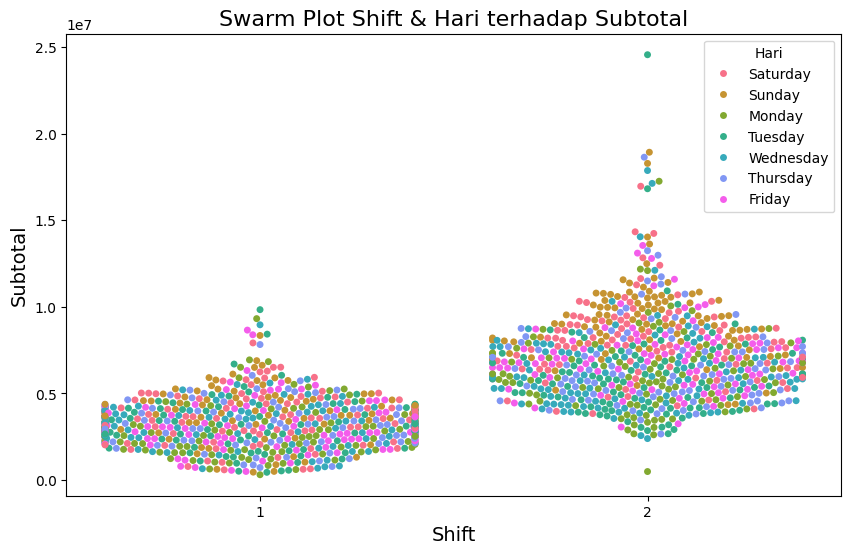

In [189]:
#size dari plot
plt.figure(figsize=(10, 6))
#swarmplot dengan sns
sns.swarmplot(x='Shift', y='Subtotal', hue='Hari', data=shift_data, palette='husl')
plt.title('Swarm Plot Shift & Hari terhadap Subtotal', fontsize=16)
plt.xlabel('Shift', fontsize=14)
plt.ylabel('Subtotal', fontsize=14)
plt.legend(title='Hari')
plt.show()

Dari Plot Histogram dan swarm plot, terlihat hari berpengaruh pada subtotal, pada weekend, terlihat penyebaran subtotal yang berada pada level tinggi (Pendapatan tinggi), sehingga hari dapat menjadi feature.

TRAINING

Data PreProcessing

Data preprocessing adalah langkah kritis dalam proses machine learning yang melibatkan manipulasi, transformasi, dan pembersihan data mentah untuk mempersiapkannya sebelum digunakan untuk melatih model machine learning. Tujuannya adalah untuk mengoptimalkan kualitas dan relevansi data sehingga model dapat menghasilkan hasil yang lebih baik.

In [190]:
#importing sklearn untuk training dan evaluasi
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

In [191]:
#Karena kita akan menggunakan RF Regressor, maka variabel kita harus angka, maka disini kita mengganti variabel hari kedalam bentuk angka\
# Ubah kolom "Tanggal" menjadi tipe data datetime
shift_data['Tanggal'] = pd.to_datetime(shift_data['Tanggal'])
# Menggunakan Tanggal untuk mengganti kolom hari menjadi angka
shift_data['Hari'] = shift_data['Tanggal'].dt.dayofweek

In [192]:
#Data yang berpengaruh pada subtotal adalah Hari dan Shift (Pada Visualisasi dan EDA tadi), masukkan ke kolom features untuk random forest
features = shift_data[['Shift', 'Hari']]
# Pisahkan data menjadi set pelatihan (train) dan set pengujian (test)
X_train, X_test, y_train, y_test = train_test_split(features, shift_data['Subtotal'], test_size=0.2, random_state=42)

In [193]:
# Buat dan latih model Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
#model membuat 100 decision tree dengan random state 42
model.fit(X_train, y_train)
#Training model dengan variabel split X Train dan Y Train

RandomForestRegressor(random_state=42)

In [194]:
# Evaluasi performa model pada set pengujian
y_pred = model.predict(X_test)
#hitung mse, r2, dan mae
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 3588711381582.1025
Mean Absolute Error: 1326214.2504209597
R-squared: 0.5160000179816058


In [195]:
# Buat dan latih model Random Forest Regressor dengan n_estimators 110
model1 = RandomForestRegressor(n_estimators=110, random_state=42)
model1.fit(X_train, y_train)

RandomForestRegressor(n_estimators=110, random_state=42)

In [196]:
# Evaluasi performa model pada set pengujian
#predict model dengan model1
y_pred = model1.predict(X_test)
#hitung mse, r2, dan mae
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 3589174634000.679
Mean Absolute Error: 1326173.1074642579
R-squared: 0.5159375403570712


R-squared, juga dikenal sebagai coefficient of determination, memberikan gambaran seberapa baik model regresi sesuai dengan data yang diobservasi. R-squared berkisar antara 0 dan 1, di mana:

R-squared = 1: Model sepenuhnya menjelaskan variasi dalam data.
R-squared = 0: Model tidak menjelaskan variasi dalam data sama sekali.
Dalam konteks R-squared:

0.7-1.0: Umumnya dianggap baik. Model secara efektif menjelaskan variasi dalam data.
0.5-0.7: Dapat diterima. Model memiliki kemampuan yang baik dalam menjelaskan variasi dalam data.
0.3-0.5: Rendah. Model mungkin memiliki beberapa nilai prediktif, tetapi masih banyak variasi yang tidak dijelaskan.
0-0.3: Sangat rendah. Model tidak efektif dalam menjelaskan variasi dalam data.

Histogram Residual adalah selisih antara nilai aktual dan prediksi.
Dalam konteks prediksi model, histogram residual yang mendekat ke 0 dan memiliki frekuensi yang tinggi di sekitar nilai 0 adalah tanda yang baik. Ini menunjukkan bahwa model Anda memiliki kinerja yang baik dalam memprediksi data dan memiliki sedikit kesalahan yang signifikan.

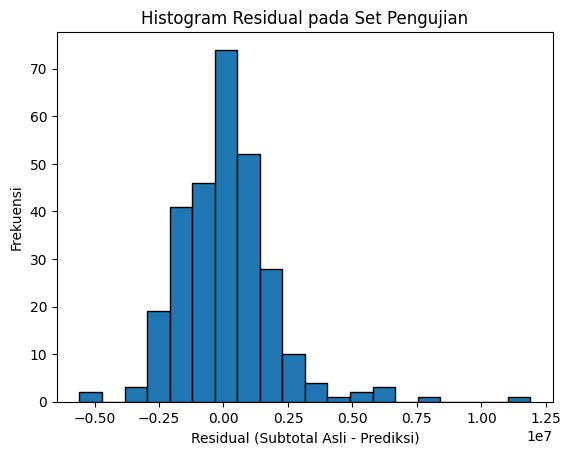

In [197]:
#Histogram Residual:

residual = y_test - y_pred
plt.hist(residual, bins=20, edgecolor='black')
plt.xlabel('Residual (Subtotal Asli - Prediksi)')
plt.ylabel('Frekuensi')
plt.title('Histogram Residual pada Set Pengujian')
plt.show()


DATA BARU UNTUK PREDIKSI
Membuat 7 hari kedepan untuk prediksi setiap shift

In [198]:
hari = 7
new_data = []
# Looping untuk append new_data, menambah data baru
for day in range(1, hari + 1):
    new_data.append((1, day))
    new_data.append((2, day))
# Buat ke bentuk dataframe
data_baru = pd.DataFrame(new_data, columns=['Shift', 'Hari'])


In [199]:
data_baru

,Shift,Hari
0,1,1
1,2,1
2,1,2
3,2,2
4,1,3
5,2,3
6,1,4
7,2,4
8,1,5
9,2,5


Predict new data

In [200]:
#prediksi data dengan model1
y_pred2=model1.predict(data_baru)

In [201]:
#memasukan hasil prediksi ke df
data_baru['Prediksi']=y_pred2

In [202]:
#menampilkan data
data_baru

,Shift,Hari,Prediksi
0,1,1,3.043357e+06
1,2,1,6.085211e+06
2,1,2,3.240751e+06
3,2,2,5.979769e+06
4,1,3,3.263139e+06
5,2,3,6.735694e+06
6,1,4,3.021983e+06
7,2,4,7.024170e+06
8,1,5,3.592588e+06
9,2,5,8.060434e+06
